In [1]:
import json
from src.utils.clean_prediction import extract_numbers
import matplotlib.pyplot as plt

[20, 10, 20]
[95, 95, 95]
[25, 20, 15]
[10, 20, 10]
[95, 95, 95]
[85, 85, 85]
[85, 85, 85]
[85, 75, 85]
[85, 85, 80]
[95, 90, 90]
[90, 85, 85]
[95, 85, 90]
[20, 20, 30]
[85, 85, 90]
[15, 15, 15]
[15, 15, 15]
[85, 85, 85]
[85, 85, 90]
[90, 85, 90]
[85, 90, 85]
[10, 15, 10]
[75, 90, 85]
[20, 15, 15]
[90, 90, 90]
[85, 85, 85]
[85, 85, 85]
[90, 85, 90]
[10, 10, 10]
[75, 60, 75]
[10, 10, 15]
[15, 15, 10]
[85, 95, 95]
[85, 85, 85]
[90, 95, 95]
[10, 15, 15]
[10, 10, 15]
[90, 90, 90]
[85, 85, 85]
[15, 15, 10]
[85, 85, 85]
[85, 95, 85]
[15, 20, 25]
[10, 20, 20]
[85, 85, 85]
[95, 95, 95]
[65, 65, 60]
[10, 15, 10]
[90, 85, 85]
[85, 85, 85]
[90, 90, 90]
[85, 85, 85]
[90, 85, 85]
[85, 90, 85]
[95, 75, 85]
[10, 10, 15]
[90, 90, 90]
[85, 85, 85]
[85, 75, 85]
[90, 85, 85]
[75, 75, 75]
[85, 80, 85]
[20, 20, 15]
[10, 10, 10]
[85, 85, 85]
[90, 90, 95]
[85, 85, 90]
[10, 10, 10]
[25, 40, 35]
[30, 20, 25]
[95, 95, 95]
[15, 15, 15]
[90, 90, 85]
[90, 90, 90]
[85, 85, 85]
[10, 10, 10]
[80, 90, 85]
[60, 60, 60]

C:\Users\uni21\AppData\Local\Temp\ipykernel_18952\2296690431.py:51: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


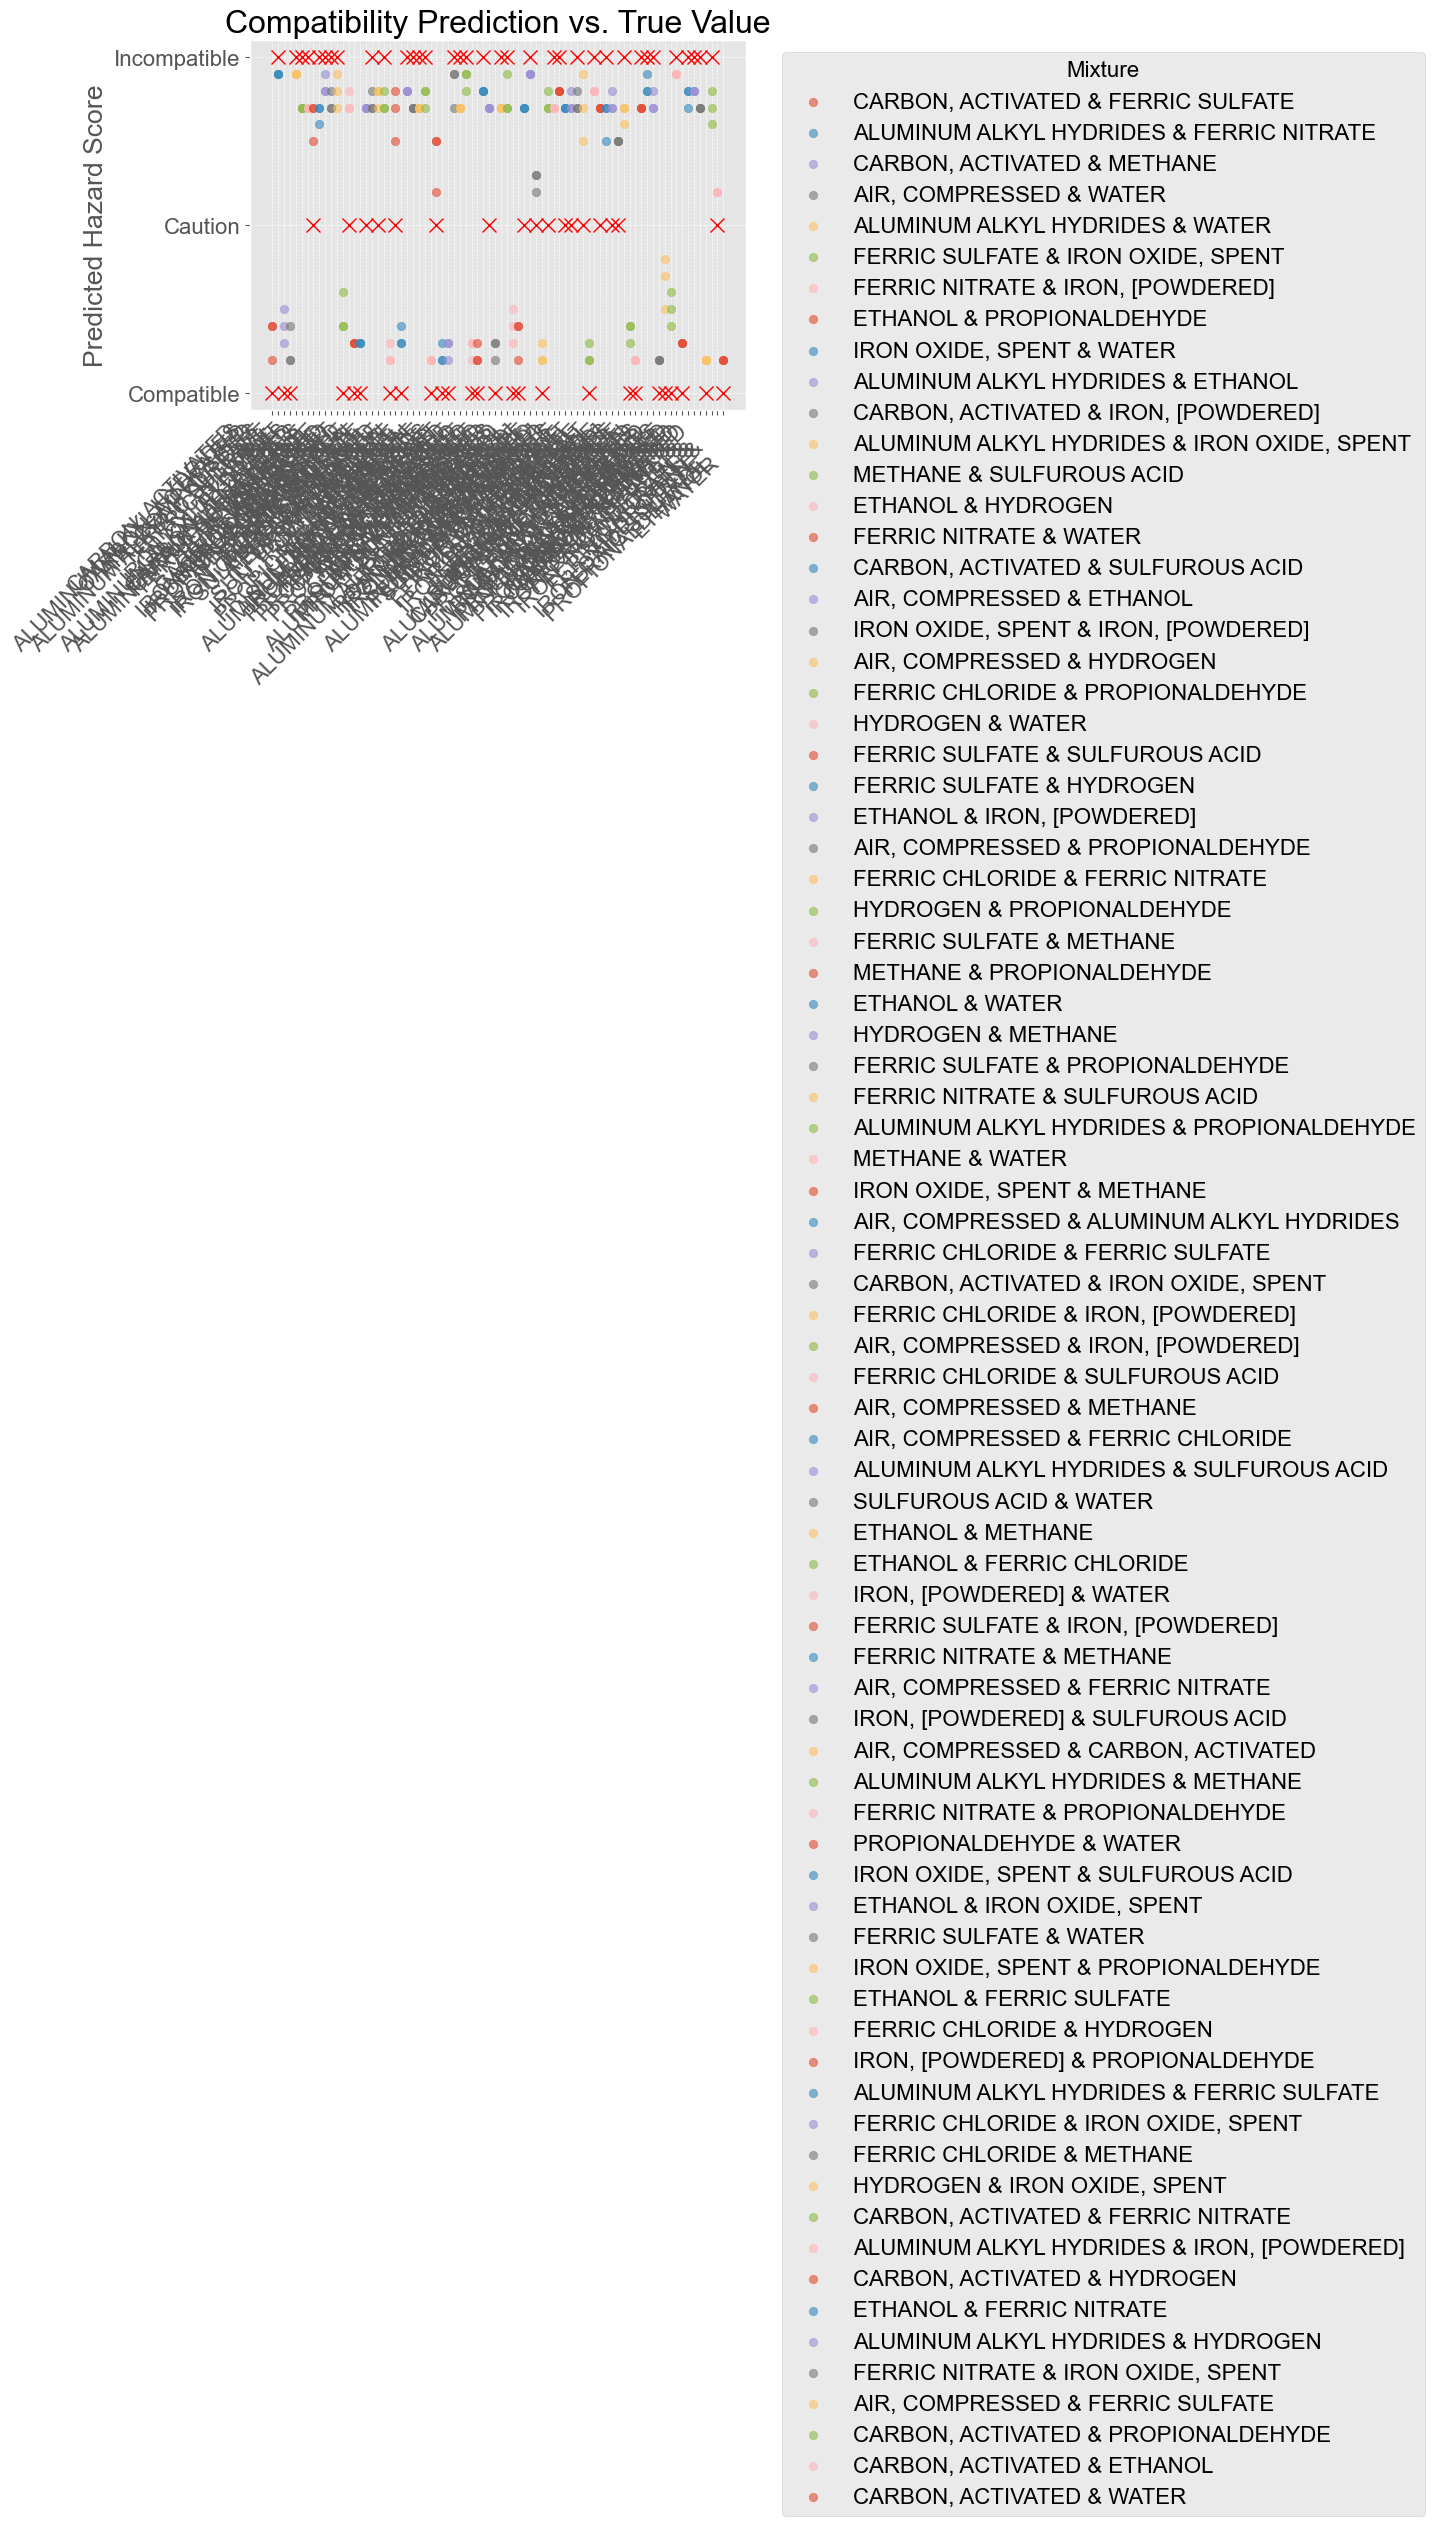

In [14]:
from collections import Counter
import random
import json

# JSONファイルを読み込む（今回はサンプルデータを使用）
# 実際には、ユーザーが提供するファイルパスを使用する
file_path = 'results/mixture_practice_w_reason_numeric_20240218_144246.json'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 予測結果のサンプルデータ
with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# predicted_resultsがないレコードを除外し、str型が紛れ込んでいるpredicted_resultsを数値型に置き換える
data = [
    {**record, 'predicted_results': [int(value) if isinstance(value, str) else value for value in record['predicted_results']]}
    for record in data if 'predicted_results' in record
]
# 正解と予測値の関係をグラフィカルに表示
fig, ax = plt.subplots()

# 各サンプルに対して処理
for idx, record in enumerate(data):
    # 正解を数値化（Incompatible=100, Compatible=0, Caution=50とする）
    result_mapping = {'Incompatible': 100, 'Compatible': 0, 'Caution': 50}
    true_value = result_mapping[record['result']]
    
    # 予測値をプロット
    predicted_values = record['predicted_results']
    print(predicted_values)
    ax.scatter([idx] * len(predicted_values), predicted_values, alpha=0.6, label=f"{record['substance1']} & {record['substance2']}")
    
    # 正解をプロット
    ax.plot(idx, true_value, 'rx', markersize=10)  # 正解を赤いXで表示

# グラフの設定
ax.set_title('Compatibility Prediction vs. True Value')
ax.set_ylabel('Predicted Hazard Score')
ax.set_xticks(range(len(data)))
ax.set_xticklabels([f"{record['substance1']}\n&\n{record['substance2']}" for record in data], rotation=45, ha='right')
ax.set_yticks([0, 50, 100])
ax.set_yticklabels(['Compatible', 'Caution', 'Incompatible'])
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# 凡例の表示
ax.legend(title="Mixture", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()




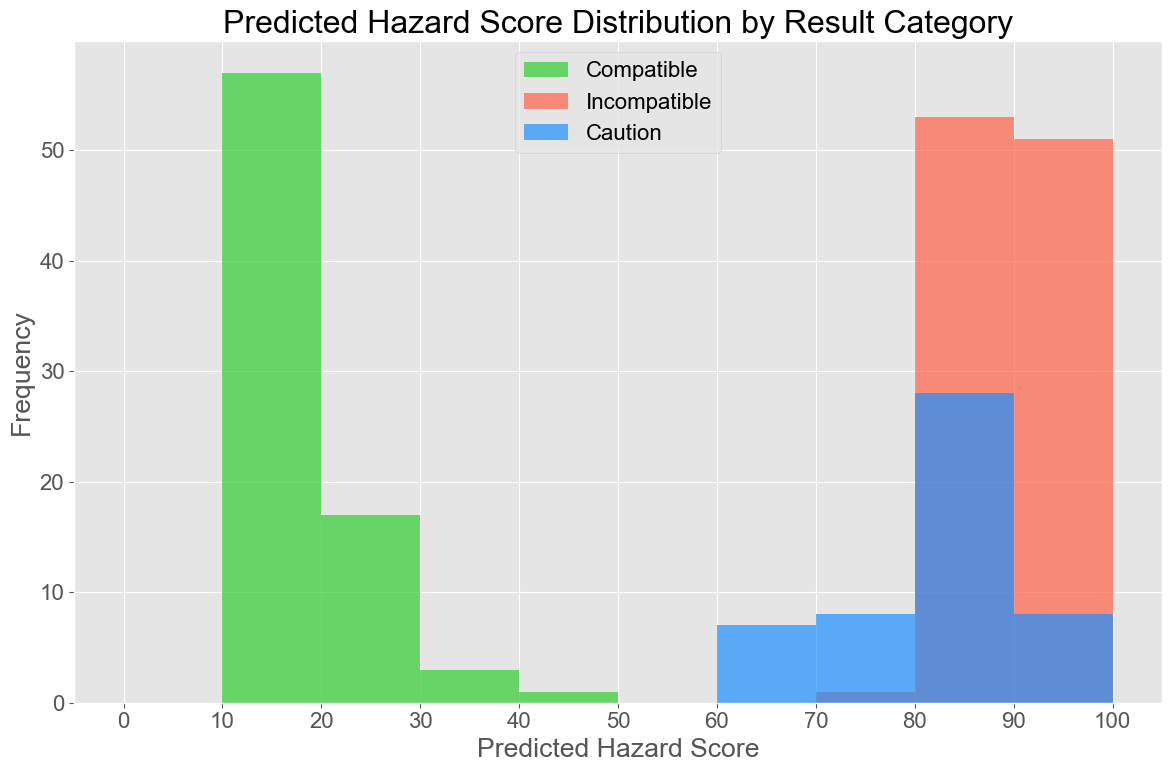

In [15]:
# 分布を比較するために、compatible, incompatible, cautionのそれぞれのpredicted_resultsの点数分布をプロットする
compatible_scores = []
incompatible_scores = []
caution_scores = []

# データをカテゴリーに分類
for record in data:
    if record['result'] == 'Compatible':
        compatible_scores.extend(record['predicted_results'])
    elif record['result'] == 'Incompatible':
        incompatible_scores.extend(record['predicted_results'])
    elif record['result'] == 'Caution':
        caution_scores.extend(record['predicted_results'])

# matplotlibのスタイルとフォント設定を更新
plt.style.use('ggplot')  # グラフのスタイルをggplotスタイルに設定
plt.rc('font', family='Arial', size=16)  # フォントスタイルとサイズを設定

# 各カテゴリーの点数分布をヒストグラムでプロット（ビビッドな色調で）
plt.figure(figsize=(12, 8))

plt.hist(compatible_scores, bins=range(0, 101, 10), alpha=0.7, color='limegreen', label='Compatible')
plt.hist(incompatible_scores, bins=range(0, 101, 10), alpha=0.7, color='tomato', label='Incompatible')
plt.hist(caution_scores, bins=range(0, 101, 10), alpha=0.7, color='dodgerblue', label='Caution')

plt.xlabel('Predicted Hazard Score')
plt.ylabel('Frequency')
plt.title('Predicted Hazard Score Distribution by Result Category')
plt.xticks(range(0, 101, 10))
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# 予測結果の多数決を取り、最終的な予測と実際の結果の一致度を測定する関数
def measure_prediction_accuracy(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data_list = json.load(f)
    
    # 一致度を測定する
    total_entries = 0
    exact_matches = 0  # 実際の結果と最終的な予測結果が完全に一致した回数
    majority_votes = []  # 多数決による予測結果のリスト

    for data in data_list:
        try:
            actual_result = data['result']
            predicted_results = data['predicted_results']  # 予測結果のリストを取得
    
            # 予測結果のカウントを取得
            result_counts = Counter(predicted_results)
    
            # 最も多い予測結果を取得（同率一位の場合はランダムに選択）
            max_count = max(result_counts.values())
            top_results = [result for result, count in result_counts.items() if count == max_count]
            final_prediction = random.choice(top_results) if len(top_results) > 1 else top_results[0]
    
            majority_votes.append(final_prediction)
    
            # 実際の結果と最終的な予測結果の一致をチェック
            if final_prediction == actual_result:
                exact_matches += 1
            total_entries += 1

        except:    
            total_entries += 1

    # 一致率を計算
    match_rate = (exact_matches / total_entries) * 100

    return {
        "total_entries": total_entries,
        "exact_matches": exact_matches,
        "match_rate": match_rate,
        "majority_votes": majority_votes
    }

# 関数を実行して結果を取得
accuracy_results = measure_prediction_accuracy(file_path)
accuracy_results["match_rate"]

In [6]:
file_path_wo = 'results/mixture_practice_wo_reason_20240213_113213.json'
# 関数を実行して結果を取得
accuracy_results_wo = measure_prediction_accuracy(file_path_wo)
accuracy_results_wo["match_rate"]

42.857142857142854

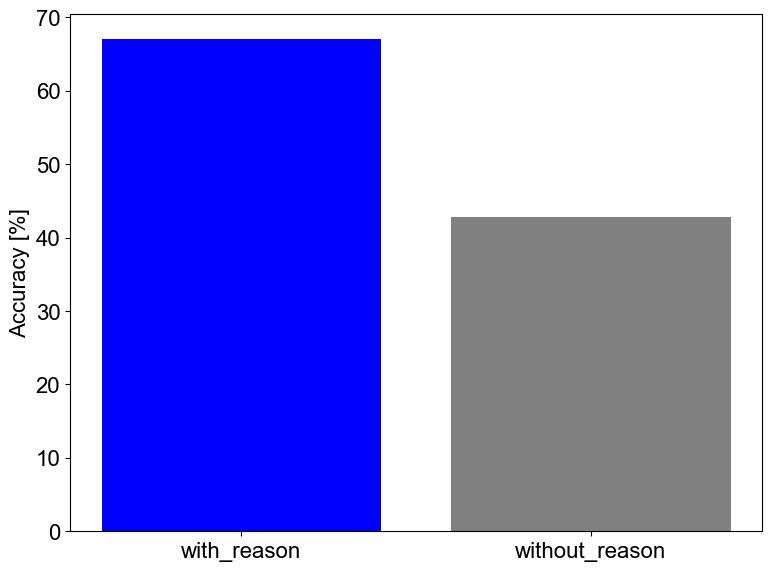

In [15]:
labels = ["with_reason", "without_reason"]
seiseki = [accuracy_results["match_rate"], accuracy_results_wo["match_rate"]]

# フォントとフォントサイズの設定
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 16

# 棒グラフの色をソフトで上品な色に変更
soft_blue = '#89CFF0'
soft_yellow = '#FFFACD'

# 棒グラフの作成（色を更新）
plt.figure(figsize=(8, 6))
plt.bar(labels, seiseki, color=["blue", "gray"])

# タイトルと軸のラベルの追加
plt.ylabel('Accuracy [%]')

# グラフの表示
plt.tight_layout()
plt.show()